In [42]:
!pip install -q kagglehub==0.3.12 seaborn matplotlib xgboost scikit-learn pandas

import pandas as pd
import seaborn as sns
import kagglehub
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (classification_report, 
accuracy_score,roc_auc_score, roc_curve,
ConfusionMatrixDisplay)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.tree import plot_tree

path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\kevin\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


In [43]:
#reads the data from the file, extracts the csv file and stores it into a data frame
data_path = path + "\data.csv"
df = pd.read_csv(data_path)
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [44]:
#Preprocess the data
cleaned_data = df.dropna(axis=1)
cleaned_data = df.drop(['Unnamed: 32'], axis=1)
display(cleaned_data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


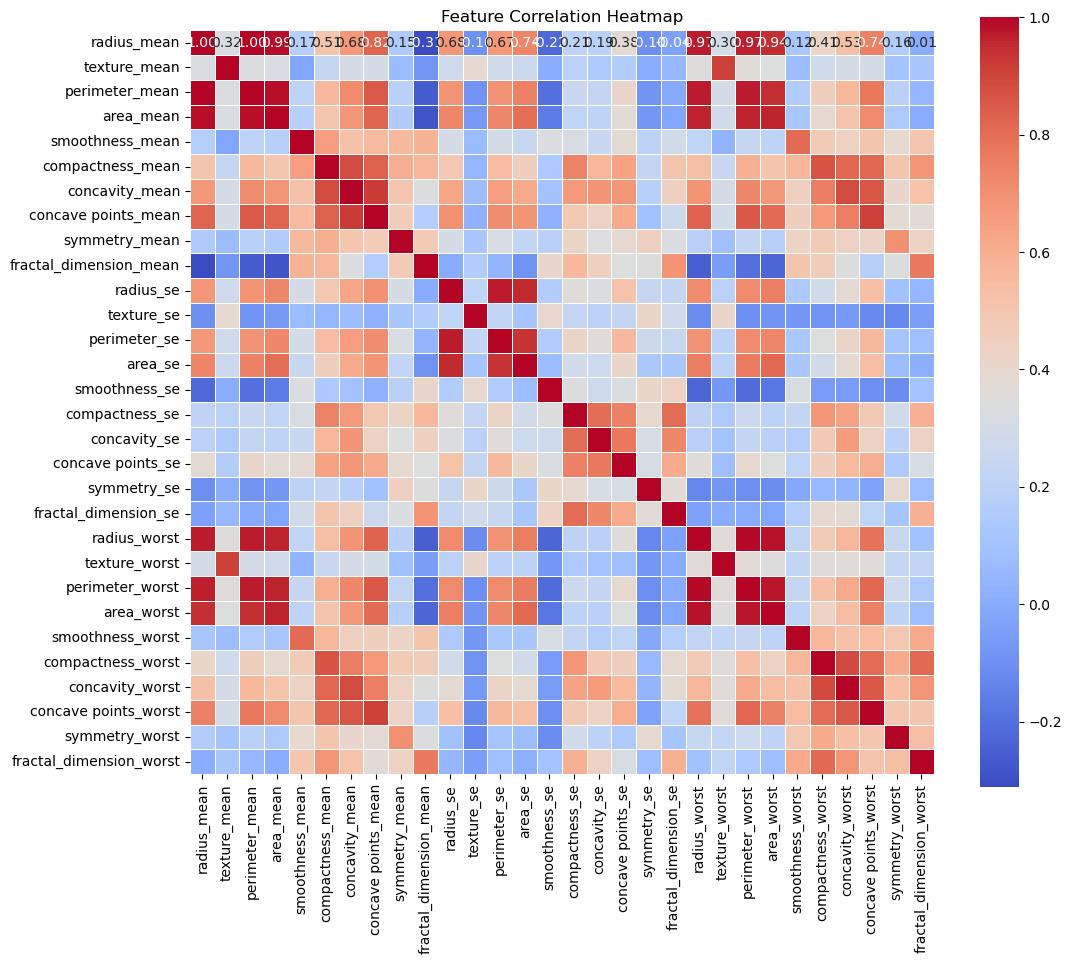

In [61]:
corr_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [62]:
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
corr_var = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Highly correlated features:", corr_var)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)

Highly correlated features: ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
                    Feature          VIF
0               radius_mean  3806.115296
2            perimeter_mean  3786.400419
20             radius_worst   799.105946
22          perimeter_worst   405.023336
3                 area_mean   347.878657
23               area_worst   337.221924
10                radius_se    75.462027
6            concavity_mean    70.767720
12             perimeter_se    70.359695
7       concave points_mean    60.041733
5          compactness_mean    50.505168
13                  area_se    41.163091
25        compactness_worst    36.982755
27     concave points_worst    36.763714
26          concavity_worst    31.970723
29  fractal_dimension_worst    18.861533
21            texture_worst    18.569966
9   

In [46]:
def reduce_vif(X, thresh=5.0):
    X_scaled = StandardScaler().fit_transform(X)
    variables = list(X.columns)
    dropped = []

    while True:
        vif = [variance_inflation_factor(X_scaled, i) for i in range(len(variables))]
        max_vif = max(vif)
        if max_vif < thresh:
            break
        max_index = vif.index(max_vif)
        feature_to_drop = variables[max_index]
        print(f"Dropping '{feature_to_drop}' with VIF = {max_vif:.2f}")
        dropped.append(feature_to_drop)
        variables.pop(max_index)
        X_scaled = StandardScaler().fit_transform(X[variables])

    print(f"\nRemaining features: {variables}")
    return X[variables], dropped

In [64]:
from sklearn.model_selection import train_test_split

#Since we are using binary classification, map the target column 'Diagnosis' accordingly
cleaned_data['diagnosis'] = cleaned_data['diagnosis'].map({'M':1, 'B':0})

#Prepare feature and target variables
X = cleaned_data.drop(['id', 'diagnosis'], axis=1)
y = cleaned_data['diagnosis']

X_reduced, dropped_features = reduce_vif(X, thresh=5.0)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

Dropping 'radius_mean' with VIF = 3806.12
Dropping 'radius_worst' with VIF = 616.35
Dropping 'perimeter_mean' with VIF = 325.64
Dropping 'perimeter_worst' with VIF = 123.26
Dropping 'concavity_mean' with VIF = 64.65
Dropping 'radius_se' with VIF = 35.62
Dropping 'compactness_worst' with VIF = 33.96
Dropping 'concave points_worst' with VIF = 30.60
Dropping 'area_mean' with VIF = 25.39
Dropping 'compactness_mean' with VIF = 18.84
Dropping 'texture_worst' with VIF = 17.23
Dropping 'area_se' with VIF = 16.33
Dropping 'concavity_worst' with VIF = 15.51
Dropping 'concave points_mean' with VIF = 8.98
Dropping 'fractal_dimension_worst' with VIF = 8.39
Dropping 'smoothness_worst' with VIF = 7.51
Dropping 'compactness_se' with VIF = 5.13

Remaining features: ['texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'perimeter_se', 'smoothness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'symmetry_worst']


In [48]:
#Log Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.9473684210526315
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



C:\Users\kevin\anaconda3b\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


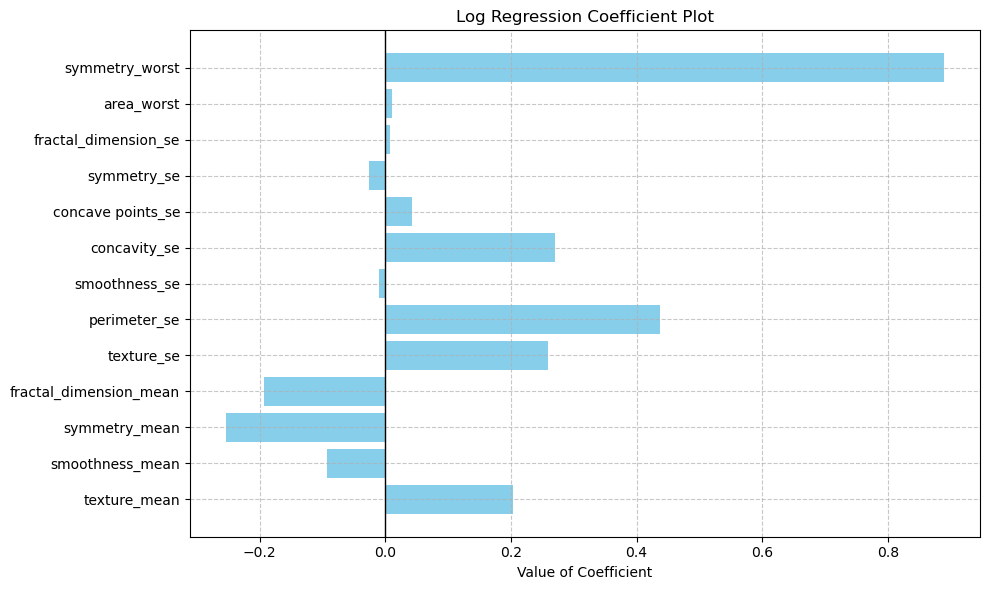

In [49]:
#Coefficient Plot

feature_names = X_train.columns
coefficients = log_model.coef_[0]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel("Value of Coefficient")
plt.title("Log Regression Coefficient Plot")
plt.axvline(x=0, color='black', linewidth=1.0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [63]:
#Random Forest
rforest_model = RandomForestClassifier(
    n_estimators=100,       
    max_depth=5,           
    min_samples_split=10,   
    min_samples_leaf=4,      
    max_features='sqrt',   
    random_state=42
)

rforest_model.fit(X_train, y_train)
y_pred = rforest_model.predict(X_test)

print(classification_report(y_test, y_pred))

feature_importances = pd.Series(rforest_model.feature_importances_, index=X_reduced.columns)
print(feature_importances.sort_values(ascending=False))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

area_worst                0.356189
perimeter_se              0.176193
symmetry_worst            0.096654
concavity_se              0.088780
texture_mean              0.082916
concave points_se         0.055712
smoothness_mean           0.031277
symmetry_se               0.027974
symmetry_mean             0.024357
fractal_dimension_mean    0.019182
fractal_dimension_se      0.017250
smoothness_se             0.012149
texture_se                0.011366
dtype: float64


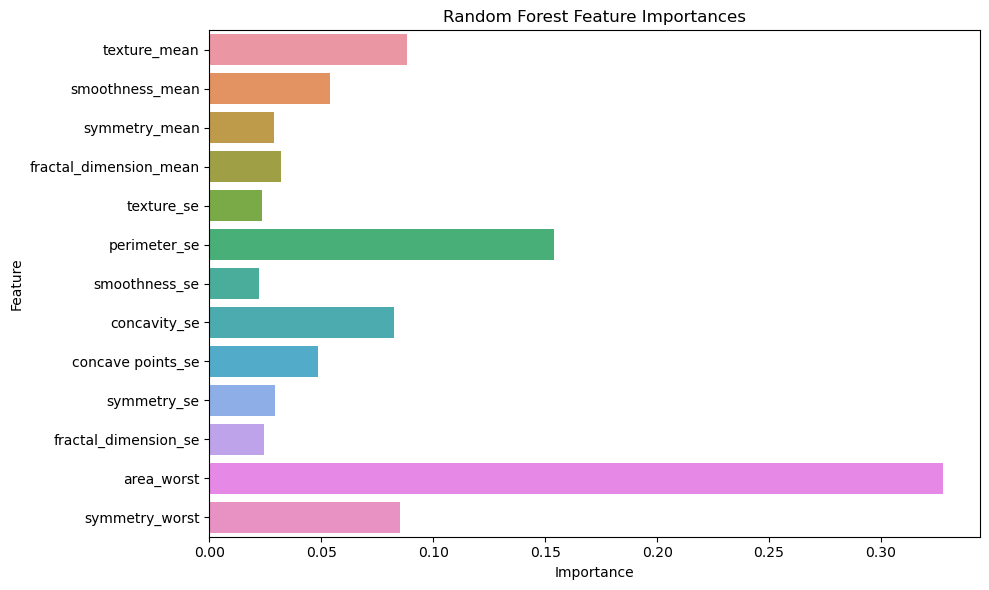

In [52]:
#Bar Plot to showcase feature performance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

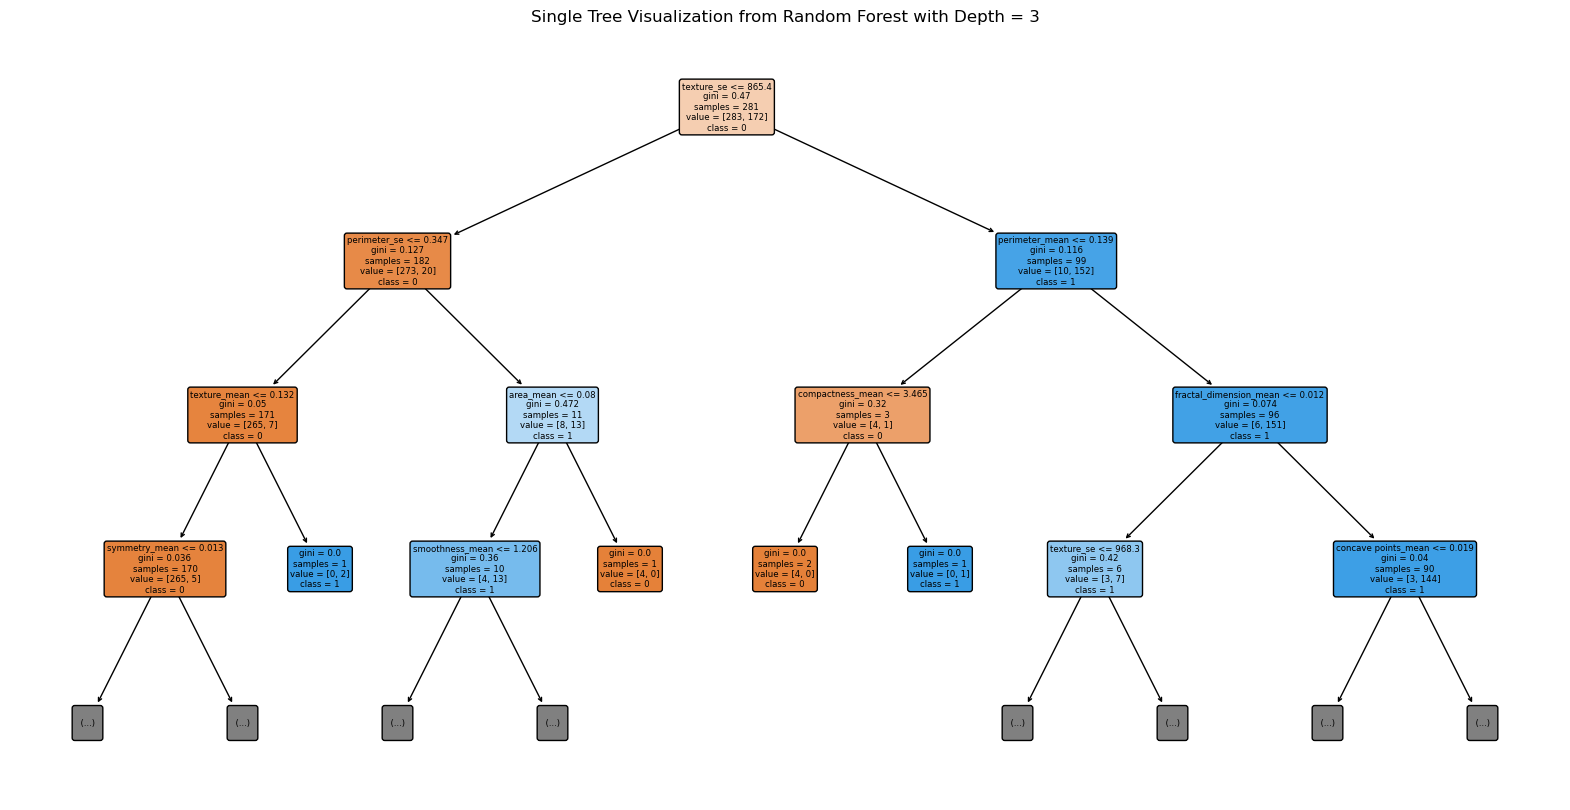

In [53]:
#Single Tree from Random Forest Visualization
plt.figure(figsize=(20, 10))
plot_tree(rforest_model.estimators_[0],
         max_depth=3,
         filled=True,
         feature_names=X.columns,
         class_names=[str(cls) for cls in rforest_model.classes_],
                      rounded=True)
plt.title("Single Tree Visualization from Random Forest with Depth = 3")
plt.show()

In [54]:
#SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.92        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [56]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_reduced.columns)
print("XGBoost Feature Importances:\n", xgb_importance.sort_values(ascending=False))

# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
print("\nLightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))

lgb_importance = pd.Series(lgb_model.feature_importances_, index=X_reduced.columns)
print("LightGBM Feature Importances:\n", lgb_importance.sort_values(ascending=False))

# CatBoost
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
print("\nCatBoost Classification Report:\n", classification_report(y_test, y_pred_cat))

cat_importance = pd.Series(cat_model.feature_importances_, index=X_reduced.columns)
print("CatBoost Feature Importances:\n", cat_importance.sort_values(ascending=False))

C:\Users\kevin\anaconda3b\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

XGBoost Feature Importances:
 area_worst                0.505797
symmetry_worst            0.082884
texture_mean              0.069532
concavity_se              0.062036
fractal_dimension_mean    0.059525
perimeter_se              0.055150
smoothness_mean           0.044372
texture_se                0.028543
smoothness_se             0.027660
concave points_se         0.024309
symmetry_se               0.016051
fractal_dimension_se      0.013769
symmetry_mean             0.010374
dtype: float32
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative

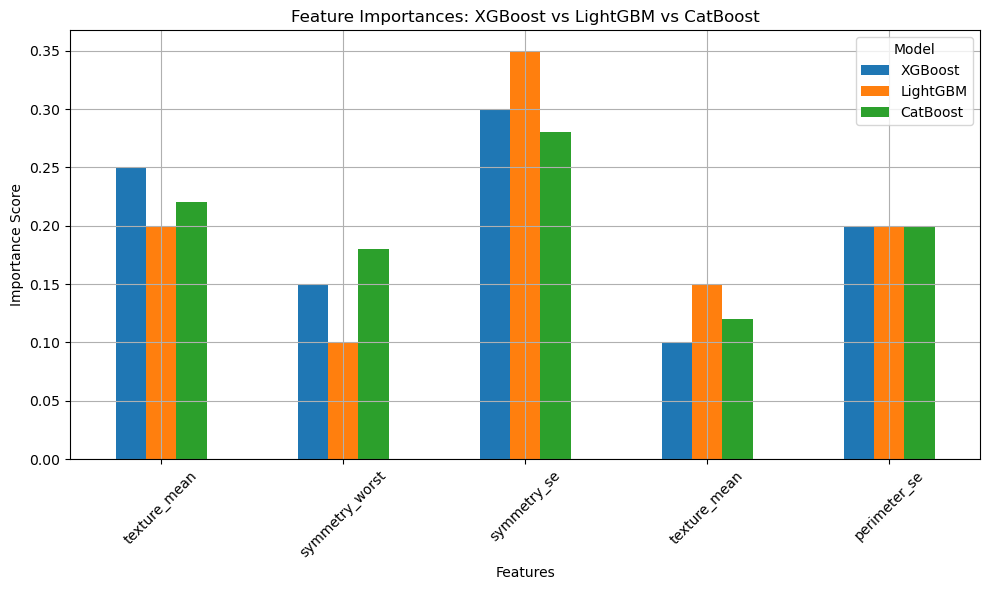

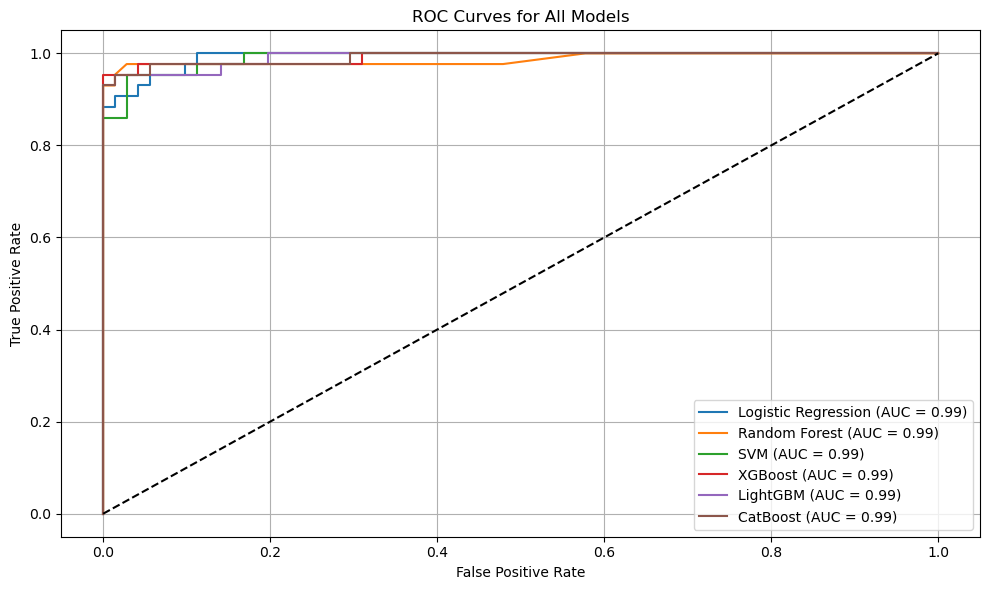

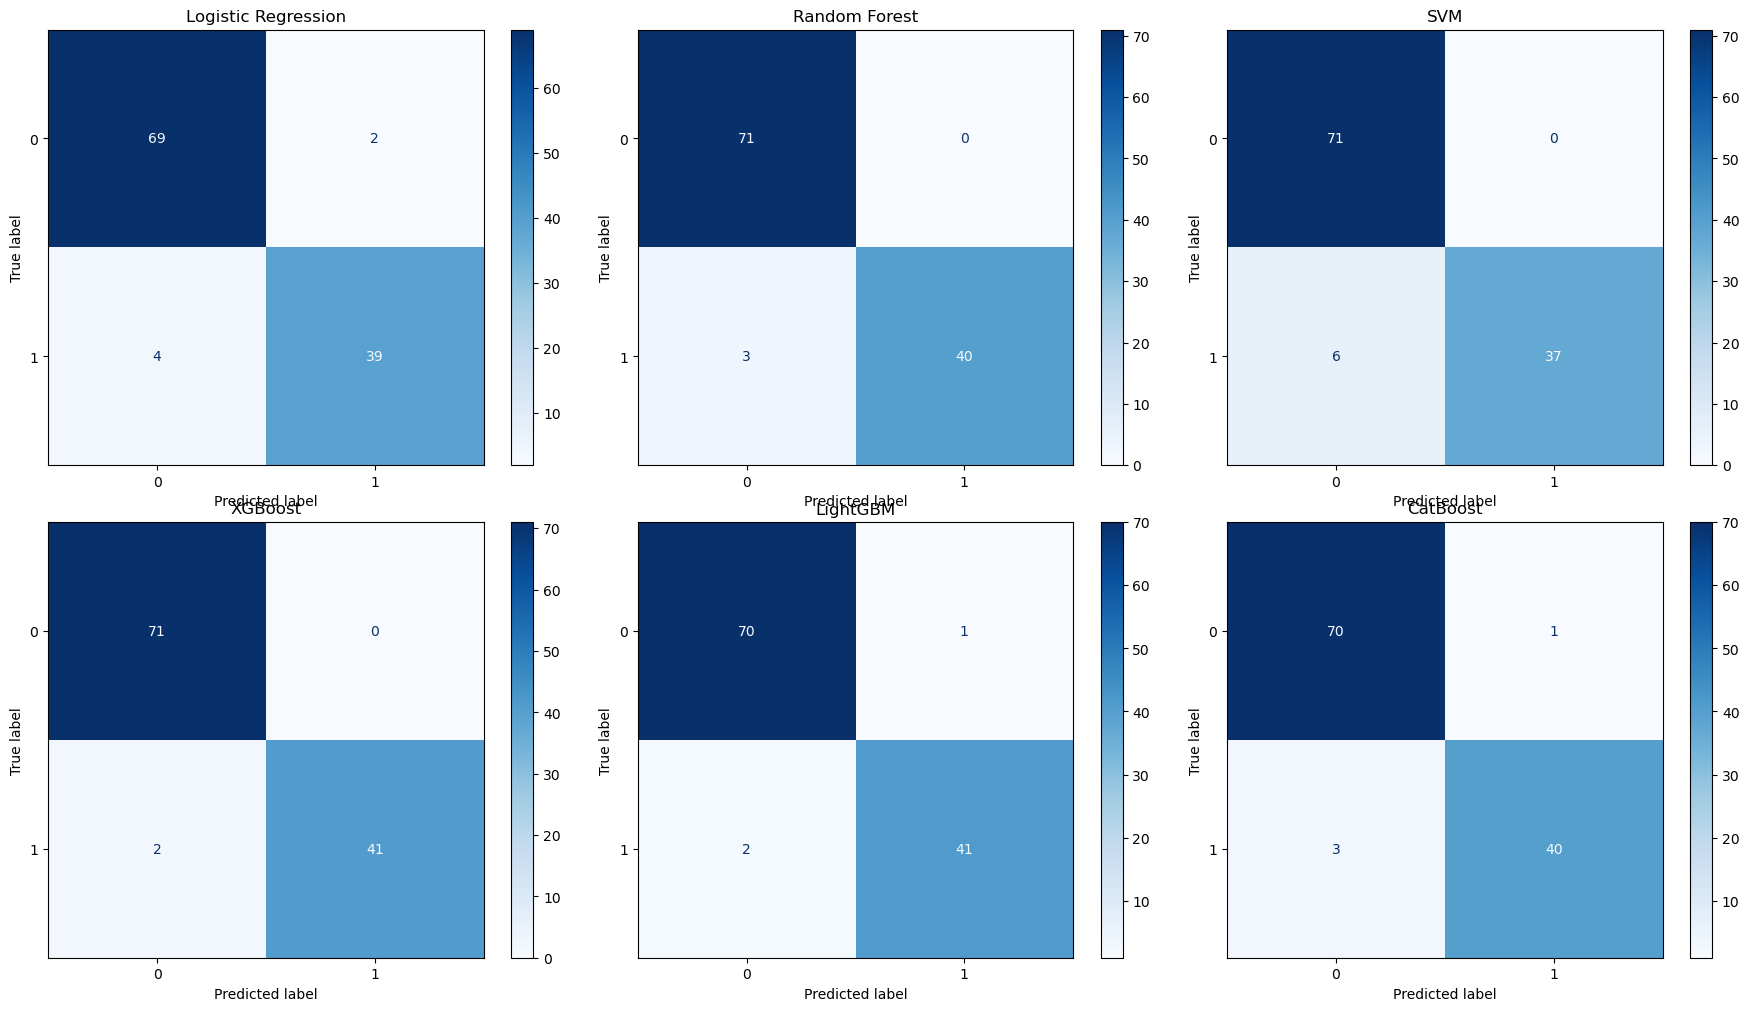

In [57]:
features = ['texture_mean', 'symmetry_worst', 'symmetry_se', 'texture_mean', 'perimeter_se']
xgb_importance = pd.Series([0.25, 0.15, 0.30, 0.10, 0.20], index=features)
lgb_importance = pd.Series([0.20, 0.10, 0.35, 0.15, 0.20], index=features)
cat_importance = pd.Series([0.22, 0.18, 0.28, 0.12, 0.20], index=features)

importance_df = pd.DataFrame({
    'XGBoost': xgb_importance,
    'LightGBM': lgb_importance,
    'CatBoost': cat_importance
})

importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances: XGBoost vs LightGBM vs CatBoost')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.grid(True)
plt.show()


#ROC AUC

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

log_probs = log_model.predict_proba(X_test)[:,1]
rf_probs = rforest_model.predict_proba(X_test)[:,1]
svm_probs = svm_model.predict_proba(X_test)[:,1]
xgb_probs = xgb_model.predict_proba(X_test)[:,1]
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]
cat_probs = cat_model.predict_proba(X_test)[:, 1]

fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, lgb_probs)
fpr_cat, tpr_cat, _ = roc_curve(y_test, cat_probs)

auc_scores = {
    'Logistic Regression': roc_auc_score(y_test, log_probs),
    'Random Forest': roc_auc_score(y_test, rf_probs),
    'SVM': roc_auc_score(y_test, svm_probs),
    'XGBoost': roc_auc_score(y_test, xgb_probs),
    'LightGBM': roc_auc_score(y_test, lgb_probs),
    'CatBoost': roc_auc_score(y_test, cat_probs)
}

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_scores["Logistic Regression"]:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_scores["Random Forest"]:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_scores["SVM"]:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_scores["XGBoost"]:.2f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {auc_scores["LightGBM"]:.2f})')
plt.plot(fpr_cat, tpr_cat, label=f'CatBoost (AUC = {auc_scores["CatBoost"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

y_pred_log = log_model.predict(X_test)
y_pred_rf = rforest_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)
y_pred_cat = cat_model.predict(X_test)

# Store predictions in a dictionary for easy iteration
model_preds = {
    'Logistic Regression': y_pred_log,
    'Random Forest': y_pred_rf,
    'SVM': y_pred_svm,
    'XGBoost': y_pred_xgb,
    'LightGBM': y_pred_lgb,
    'CatBoost': y_pred_cat
}

# Plot confusion matrices
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

for ax, (name, preds) in zip(axs.ravel(), model_preds.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(name)

plt.tight_layout()
plt.show()

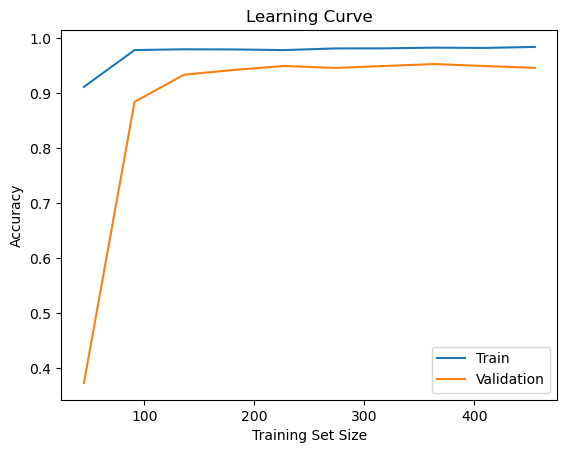

In [60]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rforest_model, X_reduced, y, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
